In [1]:
import sys

if "/Users/shvimas/GitHub/diploma/src" not in sys.path:
    sys.path.append("/Users/shvimas/GitHub/diploma/src")

In [2]:
%matplotlib inline
from importlib import reload
import matplotlib.pyplot as pl
import data_helpers as dh
import helper_funcs as hf
import vg_pricing as vg
from pars_range import Range, ParsRange
from fft import FFT

pl.rcParams["figure.figsize"] = (15, 10)
pl.style.use('ggplot')

In [3]:
pl.rcParams["figure.figsize"] = (15, 10)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
try:
    data, info = hf.read_data("../SPH2_031612.csv")
except FileNotFoundError:
    data, info = hf.read_data("SPH2_031612.csv")

In [6]:
data, info = dh.prepare_data(data=data, info=info)

In [7]:
day = 0
rate = .008
q = rate
maturity = info[day].mat
spot = info[day].spot
is_call = True
strikes = data.strikes[is_call][day]
prices = data.prices[is_call][day]

args = (spot, strikes, maturity, rate, q, is_call)
print(args)

(1262.9, array([ 1010.,  1020.,  1025.,  1030.,  1040.,  1050.,  1060.,  1070.,
        1075.,  1080.,  1090.,  1100.,  1110.,  1120.,  1125.,  1130.,
        1140.,  1150.,  1160.,  1170.,  1175.,  1180.,  1190.,  1200.,
        1210.,  1220.,  1225.,  1230.,  1240.,  1250.,  1260.,  1270.,
        1275.,  1280.,  1290.,  1300.,  1310.,  1320.,  1325.,  1330.,
        1340.,  1350.,  1360.,  1370.,  1375.,  1380.,  1390.,  1400.,
        1410.,  1420.,  1425.,  1430.,  1440.,  1450.,  1460.]), 0.7397260273972602, 0.008, 0.008, True)


In [47]:
nu_range = Range(min=.01, max=1, num=1)
theta_range = Range(min=-.5, max=.5, num=2)
sigma_range = Range(min=.05, max=.25, num=10)

pars = ParsRange(model="vg", center=(.417, .0, 0.4), widths=(.4, .5, .3), dots=5)
#pars.nu_range = nu_range
#pars.theta_range = theta_range
#pars.sigma_range = sigma_range
print(pars.nu_range.num)
print(pars.theta_range.num)
print(pars.sigma_range.num)


5
5
5


In [48]:
predicted = []
for params in pars:
    predicted.append(strikes)
    predicted.append(vg.price_vg(pars=params, args=args))
    predicted.append("grey")
# predicted

In [10]:
fft_prices = FFT(model='vg', args=args).price((0.2, -0.25, 0.18))
print(args)
fft_prices

(1262.9, array([ 1010.,  1020.,  1025.,  1030.,  1040.,  1050.,  1060.,  1070.,
        1075.,  1080.,  1090.,  1100.,  1110.,  1120.,  1125.,  1130.,
        1140.,  1150.,  1160.,  1170.,  1175.,  1180.,  1190.,  1200.,
        1210.,  1220.,  1225.,  1230.,  1240.,  1250.,  1260.,  1270.,
        1275.,  1280.,  1290.,  1300.,  1310.,  1320.,  1325.,  1330.,
        1340.,  1350.,  1360.,  1370.,  1375.,  1380.,  1390.,  1400.,
        1410.,  1420.,  1425.,  1430.,  1440.,  1450.,  1460.]), 0.7397260273972602, 0.008, 0.008, True)


array([ 266.01680399,  257.36732764,  253.07651905,  248.80906577,
        240.34645927,  231.984018  ,  223.72631105,  215.57795419,
        211.54623347,  207.5435944 ,  199.62789231,  191.83550324,
        184.17105768,  176.63914204,  172.92429953,  169.24427998,
        161.99091459,  154.88339106,  147.9259396 ,  141.12265791,
        137.78007053,  134.47749279,  127.99422053,  121.67642574,
        115.52747903,  109.55051348,  106.62743191,  103.7484008 ,
         98.12372756,   92.67877224,   87.41548371,   82.33546152,
         79.86457531,   77.43993845,   72.72976525,   68.20539767,
         63.8668856 ,   59.71386418,   57.70668324,   55.74554665,
         51.96071893,   48.35773589,   44.93451968,   41.68856018,
         40.13114981,   38.61691824,   35.71623225,   32.98272836,
         30.41223525,   28.00020345,   26.85209137,   25.74172987,
         23.63158726,   21.6642587 ,   19.8339765 ])

In [8]:
import warnings
warnings.filterwarnings("ignore", message='numpy.dtype size changed')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore', message="can't resolve package from __spec__ or __package__, ")

In [9]:
import modeling as mo
from structs import EvalArgs
import scipy.optimize as opt
from gen_pricer import GenPricer

gp = GenPricer(model='vg', market=EvalArgs.from_structure(data, info, rate, day), use_fft=True)
actual_calls = data.prices[True][day]
actual_puts = data.prices[False][day]

In [23]:
res1 = gp.optimize_pars(metric='MAE', bounds=mo.par_bounds['vg'], 
                       actual_calls=actual_calls, actual_puts=actual_puts,
                       optimizer=opt.differential_evolution,
                       disp=True, maxiter=50, polish=True)

res1.x

differential_evolution step 1: f(x)= 20.8551
differential_evolution step 2: f(x)= 9.83779
differential_evolution step 3: f(x)= 6.18191
differential_evolution step 4: f(x)= 6.18191
differential_evolution step 5: f(x)= 5.38166
differential_evolution step 6: f(x)= 4.63547
differential_evolution step 7: f(x)= 3.78724
differential_evolution step 8: f(x)= 3.78724
differential_evolution step 9: f(x)= 2.63028
differential_evolution step 10: f(x)= 0.810078
differential_evolution step 11: f(x)= 0.810078
differential_evolution step 12: f(x)= 0.810078
differential_evolution step 13: f(x)= 0.75484
differential_evolution step 14: f(x)= 0.75484
differential_evolution step 15: f(x)= 0.448768
differential_evolution step 16: f(x)= 0.448768
differential_evolution step 17: f(x)= 0.448768
differential_evolution step 18: f(x)= 0.448768
differential_evolution step 19: f(x)= 0.431304
differential_evolution step 20: f(x)= 0.431304
differential_evolution step 21: f(x)= 0.428486
differential_evolution step 22: f

array([ 0.88488191, -0.17854478,  0.18445047])

In [25]:
res2 = gp.optimize_pars(metric='MAR', bounds=mo.par_bounds['vg'], 
                       actual_calls=actual_calls, actual_puts=actual_puts,
                       optimizer=opt.differential_evolution,
                       disp=True, maxiter=50, polish=True)

res2.x

differential_evolution step 1: f(x)= 1.28258
differential_evolution step 2: f(x)= 1.28258
differential_evolution step 3: f(x)= 1.08922
differential_evolution step 4: f(x)= 1.08922
differential_evolution step 5: f(x)= 1.08922
differential_evolution step 6: f(x)= 1.08922
differential_evolution step 7: f(x)= 1.08922
differential_evolution step 8: f(x)= 1.06626
differential_evolution step 9: f(x)= 1.03488
differential_evolution step 10: f(x)= 1.03488
differential_evolution step 11: f(x)= 1.03488
differential_evolution step 12: f(x)= 1.0192
differential_evolution step 13: f(x)= 1.01879
differential_evolution step 14: f(x)= 1.01879
differential_evolution step 15: f(x)= 1.0141
differential_evolution step 16: f(x)= 1.0141
differential_evolution step 17: f(x)= 1.0141
differential_evolution step 18: f(x)= 1.0141
differential_evolution step 19: f(x)= 1.01342
differential_evolution step 20: f(x)= 1.00757
differential_evolution step 21: f(x)= 1.00757
differential_evolution step 22: f(x)= 1.00757
di

array([ 0.91359442, -0.17457745,  0.18677032])

In [26]:
res3 = gp.optimize_pars(metric='RMR', bounds=mo.par_bounds['vg'], 
                       actual_calls=actual_calls, actual_puts=actual_puts,
                       optimizer=opt.differential_evolution,
                       disp=True, maxiter=50, polish=True)

res3.x

differential_evolution step 1: f(x)= 1.28025
differential_evolution step 2: f(x)= 1.0846
differential_evolution step 3: f(x)= 1.0846
differential_evolution step 4: f(x)= 1.0846
differential_evolution step 5: f(x)= 1.08395
differential_evolution step 6: f(x)= 1.08395
differential_evolution step 7: f(x)= 1.08395
differential_evolution step 8: f(x)= 1.08395
differential_evolution step 9: f(x)= 1.02463
differential_evolution step 10: f(x)= 1.02463
differential_evolution step 11: f(x)= 1.02296
differential_evolution step 12: f(x)= 1.01839
differential_evolution step 13: f(x)= 1.00586
differential_evolution step 14: f(x)= 1.00586
differential_evolution step 15: f(x)= 1.00472
differential_evolution step 16: f(x)= 1.00448


array([ 0.94208245, -0.166931  ,  0.19205483])

In [ ]:
print(vg.price_vg(pars=(1.9242924, 0.85896911, 0.65368481), args=args), "b",
      vg.price_vg(pars=(1.99975261, -0.0975597, 0.13875441), args=args), "m",
      vg.price_vg(pars=(1.92531088, 0.99771722, 0.28334152), args=args), "g")


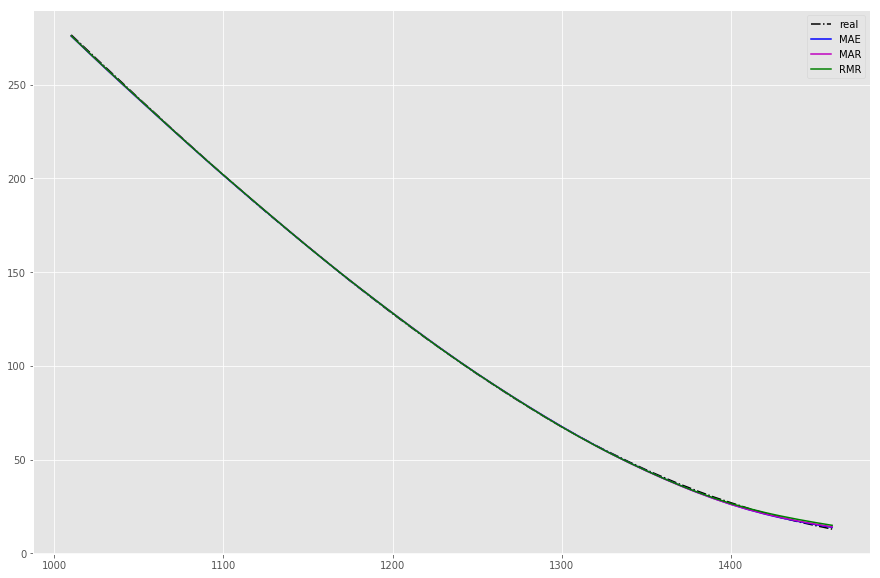

In [27]:
pl.plot(strikes, prices, "k-.", label='real')
#pl.plot(strikes, fft_prices, 'r-', label=)
pl.plot(strikes, vg.price_vg(pars=res1.x, args=args), "b", label='MAE')
pl.plot(strikes, vg.price_vg(pars=res2.x, args=args), "m", label='MAR')
pl.plot(strikes, vg.price_vg(pars=res3.x, args=args), "g", label='RMR')
pl.legend()

In [ ]:
%load_ext autoreload
%autoreload

In [ ]:
mo.par_bounds

In [ ]:
is_call = False
for d in range(0, 32):
    pl.plot(data.strikes[is_call][d], data.prices[is_call][d])

In [ ]:
spots = [info[day].spot for day in range(187)]
pl.plot(spots)

In [6]:
import warnings
warnings.filterwarnings("ignore", message='numpy.dtype size changed')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore', message="can't resolve package from __spec__ or __package__, ")

In [8]:
import numpy as np
import sklearn.decomposition as de
import os
if os.getcwd() != '/Users/shvimas/GitHub/diploma':
    os.chdir('/Users/shvimas/GitHub/diploma')

centers1 = np.array(dh.get_tuned_params(model1='ls', model2='vg', drop_bad=True))
pca1 = de.PCA(n_components=2)
pca1.fit(centers1)
print(pca1.explained_variance_ratio_)
components1 = pca1.components_
print(components1)

centers2 = np.array(dh.get_tuned_params(model1='heston', model2='vg', drop_bad=True))
pca2 = de.PCA(n_components=2)
pca2.fit(centers2)
print(pca2.explained_variance_ratio_)
components2 = pca2.components_
print(components2)

[ 0.84190932  0.12931495]
[[ 0.99648015 -0.03593817  0.07573474]
 [-0.07293771 -0.81701721  0.57198162]]
[ 0.78783578  0.18370883]
[[ 0.99150578  0.020395    0.12845362]
 [-0.01426754 -0.96461317  0.26328287]]


In [ ]:
centers1_2d = pca1.fit_transform(centers1)
centers2_2d = pca2.fit_transform(centers2)
dh.plot_dots(centers1_2d, centers2_2d, style1='b.', style2='r.')
'''
dh.plot_and_color_2d_params(model='vg', dots=centers1_2d, 
                            factors=pca.components_, means=pca.mean_,
                            bounds_only=True)
'''

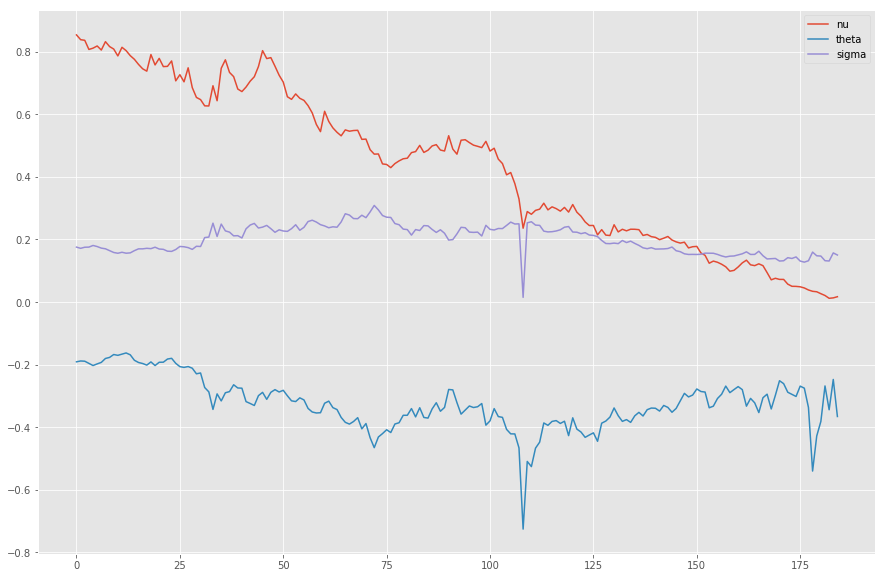

In [25]:
pl.plot(centers1[:, 0], label='nu')
pl.plot(centers1[:, 1], label='theta')
pl.plot(centers1[:, 2], label='sigma')
p = pl.legend()

In [28]:
with open('params/pca_vg.txt', 'w') as f:
    f.writelines([f"{-0.5}, {0.5}, {-0.2}, {0.25}\n",
                  f"{dh.array2str(components)}\n",
                  f"{dh.array2str(pca.mean_)}\n"])

In [29]:
components

array([[-0.98443404, -0.16438147, -0.06219608],
       [ 0.12192059, -0.89359836,  0.4319923 ]])

In [32]:
centers - (centers_2d @ components + pca.mean_)
pass

In [33]:
components @ components.transpose() @ components - components

array([[  2.22044605e-16,   8.32667268e-17,  -6.93889390e-18],
       [  2.77555756e-17,   2.22044605e-16,  -1.11022302e-16]])

In [46]:
grid = hf.grid(-0.5, 0.5, -0.17, 0.25)

In [47]:
restored = np.array(list(map(
    lambda dot: dot @ components + pca.mean_,
    grid
)))

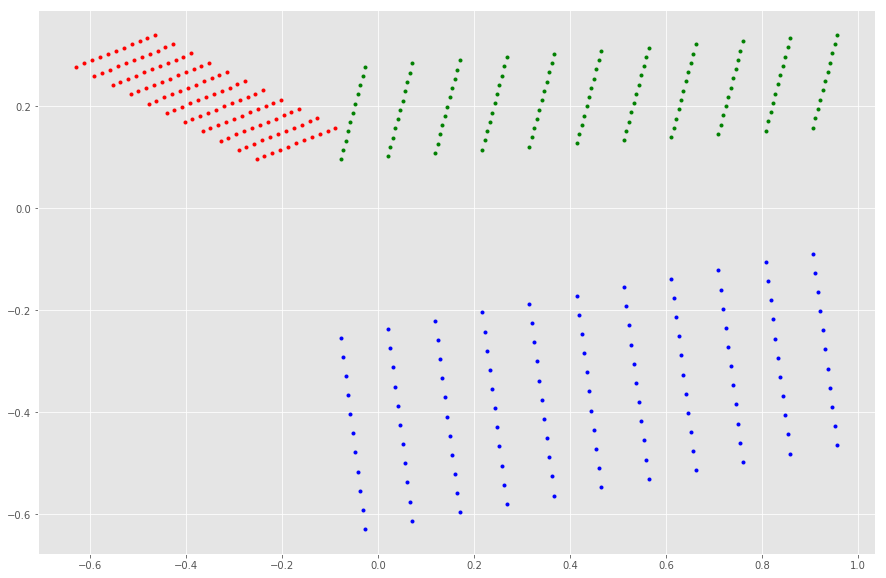

In [48]:
pl.plot(restored[:, 0], restored[:, 1], 'b.')
pl.plot(restored[:, 1], restored[:, 2], 'r.')
pl.plot(restored[:, 0], restored[:, 2], 'g.')

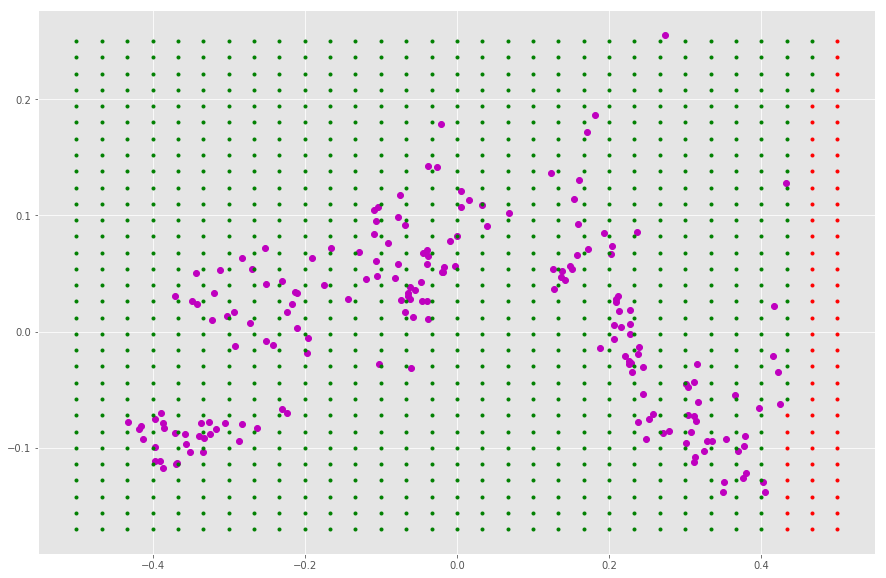

In [45]:
common_grid = np.array(hf.grid(-0.5, 0.5, -0.17, 0.25, n=30))

dh.plot_dots(centers_2d, style1='mo')
dh.plot_and_color_2d_params(model='vg', dots=common_grid, 
                            factors=pca.components_, means=pca.mean_, 
                            style_good='g.', style_bad='r.', bounds_only=False)
